In [1]:
import sys
!{sys.executable} -m pip install mysql-connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mysql.connector
from datetime import datetime
import dateutil.parser
import pylab as pla
import math

mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)

In [2]:
mycursor2 = mydb.cursor(dictionary=True)
mycursor2.execute("SELECT node_id, COUNT(node_id) FROM SensorData   WHERE timestamp > '2019-05-24 13:05:08.078133+00:00' AND timestamp < '2019-05-27 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0 GROUP BY node_id") # SELECT DISTINCT node_id FROM SensorData
# SELECT node_id, COUNT(node_id) FROM SensorData   WHERE timestamp > '2019-05-24 13:05:08.078133+00:00' AND timestamp < '2019-05-29 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0 GROUP BY node_id
nodes = pd.DataFrame(mycursor2.fetchall())
print(nodes)

    node_id  COUNT(node_id)
0      3200             321
1      3224            4578
2      3240            1879
3     51719             113
4     51735            5260
5     51751           17861
6     51850           94979
7     51866           83642
8     51889          193296
9     51968           24309
10    51976           15834
11    51992            1051
12    52003           13906
13    52023              56
14    52099           53631
15    52535          105540
16    53011           53219
17    53130          128640
18    53888               1
19    53924           12671
20    53936             265
21    54016          187915


In [ ]:
first_day = str(first_day)
first_day = first_day.strip("'00:00:00'")
first_day = first_day + " 00:00:00.000000+00:00"

last_day = str(last_day)
last_day = last_day.strip("'23:59:59'")
last_day = last_day + " 00:00:00.000000+00:00"

print("Aloituspäivä: ", first_day,"\nLopetuspäivä: ", last_day)

In [ ]:
nodes = nodes.rename(columns={'COUNT(node_id)': 'amount'})
objects = nodes.node_id
y_pos = np.arange(len(objects))
performance = nodes.amount

plt.clf()
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Määrä')
plt.title('Kärrien käyttömäärä')
plt.show()

plt.clf()
plt.pie(performance, labels=objects, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Kärryjen käyttö eriteltynä prosentteina")
plt = plt.gcf()
plt.set_size_inches(8,8)
plt.show()

# Erottelee päivät

In [ ]:
from datetime import date, timedelta
d = 0
dates = []

times = table['t'].tolist()
start_date = times[0]
end_date = times[-1]

delta = timedelta(days=1)
while start_date <= end_date:
    ts = start_date.strftime("%Y/%m/%d")
    start_date += delta
    d += 1
    dates.append(ts)
    print(d, ts)
print(dates)

# Piirtää päivät erikseen

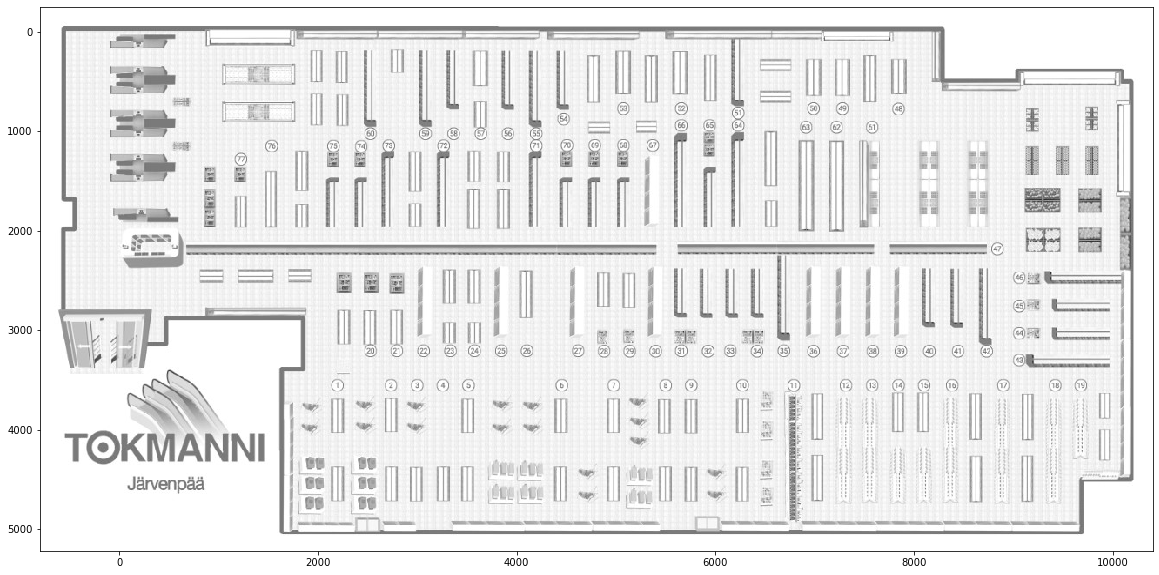

In [7]:
from matplotlib.pyplot import cm
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

x = table['X'].tolist()
y = table['Y'].tolist()

n = len(dates)
colors=iter(cm.rainbow(np.linspace(0,1,n)))

plt.rcParams['figure.figsize'] = 20, 10
img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-800, 10400, 5220, -250])

#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'c', 'm','lime', 'b', 'darkorange', 'g'])))
for i in dates:
    tsT = table.loc[table['T'] == i, :]
    c=next(colors)
    for i in range(n):
        plt.plot(tsT.X, tsT.Y, color=c)
plt.show()